## Libaries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

###  Problem 1: Write the syntax to create the following DataFrame

In [3]:



data = {
    'Class': [4, 4, 5, 1, 1, 2, 5, 2],
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male'],
    'Values': [10, 3, 1, 5, 7, 2, 5, 10]
}


In [4]:
df = pd.DataFrame(data)

print(df)

   Class  Gender  Values
0      4  Female      10
1      4    Male       3
2      5    Male       1
3      1  Female       5
4      1    Male       7
5      2  Female       2
6      5  Female       5
7      2    Male      10


### Problem 2: Write the syntax to sort this DataFrame by Class (ascending order) followed by Values (descending)


In [5]:
df_sorted = df.sort_values(by=['Class', 'Values'], ascending=[True, False])

print(df_sorted)

   Class  Gender  Values
4      1    Male       7
3      1  Female       5
7      2    Male      10
5      2  Female       2
0      4  Female      10
1      4    Male       3
6      5  Female       5
2      5    Male       1


### Problem 3: Write the syntax to group this DataFrame by Class, Gender and count the number of unique values



In [6]:
unique_counts = df.groupby(['Class', 'Gender']).nunique()

print(unique_counts)

              Values
Class Gender        
1     Female       1
      Male         1
2     Female       1
      Male         1
4     Female       1
      Male         1
5     Female       1
      Male         1


### Problem 4: Write the syntax to visualize the Data in a Scatter Plot in Python (Class on the X-axis, Values in Y), with color differentiation based on Gender.


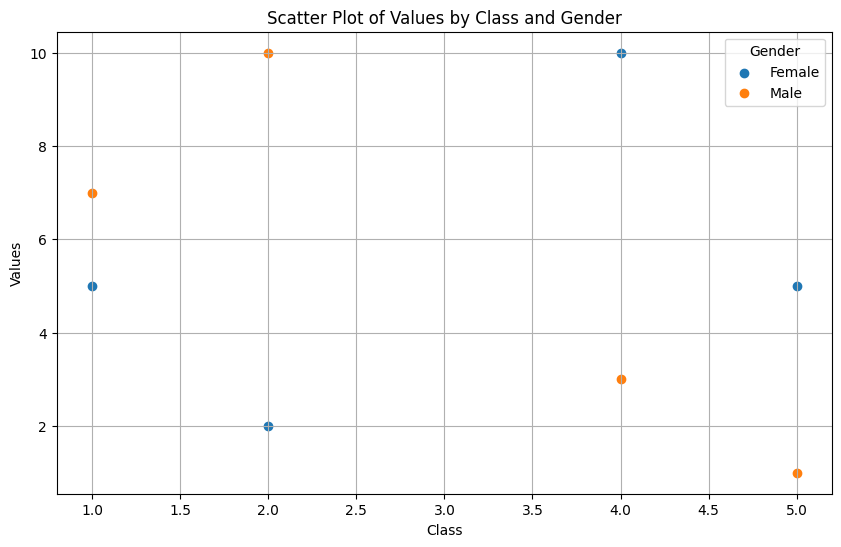

In [7]:
plt.figure(figsize=(10, 6))


for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['Class'], subset['Values'], label=gender)


plt.xlabel('Class')
plt.ylabel('Values')
plt.title('Scatter Plot of Values by Class and Gender')
plt.legend(title='Gender')
plt.grid(True)


plt.show()

### Problem 5:Write the syntax to reshape/summarize the table above, to display the following output


In [8]:
pivot_table = df.pivot_table(index='Class', columns='Gender', values='Values', aggfunc='sum', fill_value=0)


pivot_table.columns.name = None

print(pivot_table)

       Female  Male
Class              
1           5     7
2           2    10
4          10     3
5           5     1


### For Problems 6-7 : assume you have a dataframe called table_to_plot which contains 3 columns: Category, where values range from 1-9, x_variable and y_variable, where values range from 800-2000. A glimpse of the first few rows of the data frame is attached:


In [9]:

np.random.seed(0)
num_rows = 1000 

data = {
    'Category': np.random.randint(1, 10, num_rows),  
    'x_variable': np.random.uniform(800, 2000, num_rows),  
    'y_variable': np.random.uniform(800, 2000, num_rows)   
}

table_to_plot = pd.DataFrame(data)

In [10]:
table_to_plot.head(10)

,Category,x_variable,y_variable
0,6,987.984190,1987.717838
1,1,1620.950874,1572.954416
2,4,840.884918,911.904793
3,4,1862.248729,1728.026021
4,8,1813.824300,1409.448400
5,4,1412.153600,934.417644
6,6,953.226370,1418.183537
7,3,1545.767643,1706.287571
8,5,1087.204405,940.570266
9,8,1557.045280,1227.507160


### Problem 6 : Use R or Python to plot all of the following graphs at once, in one window, for easier comparison of categories.


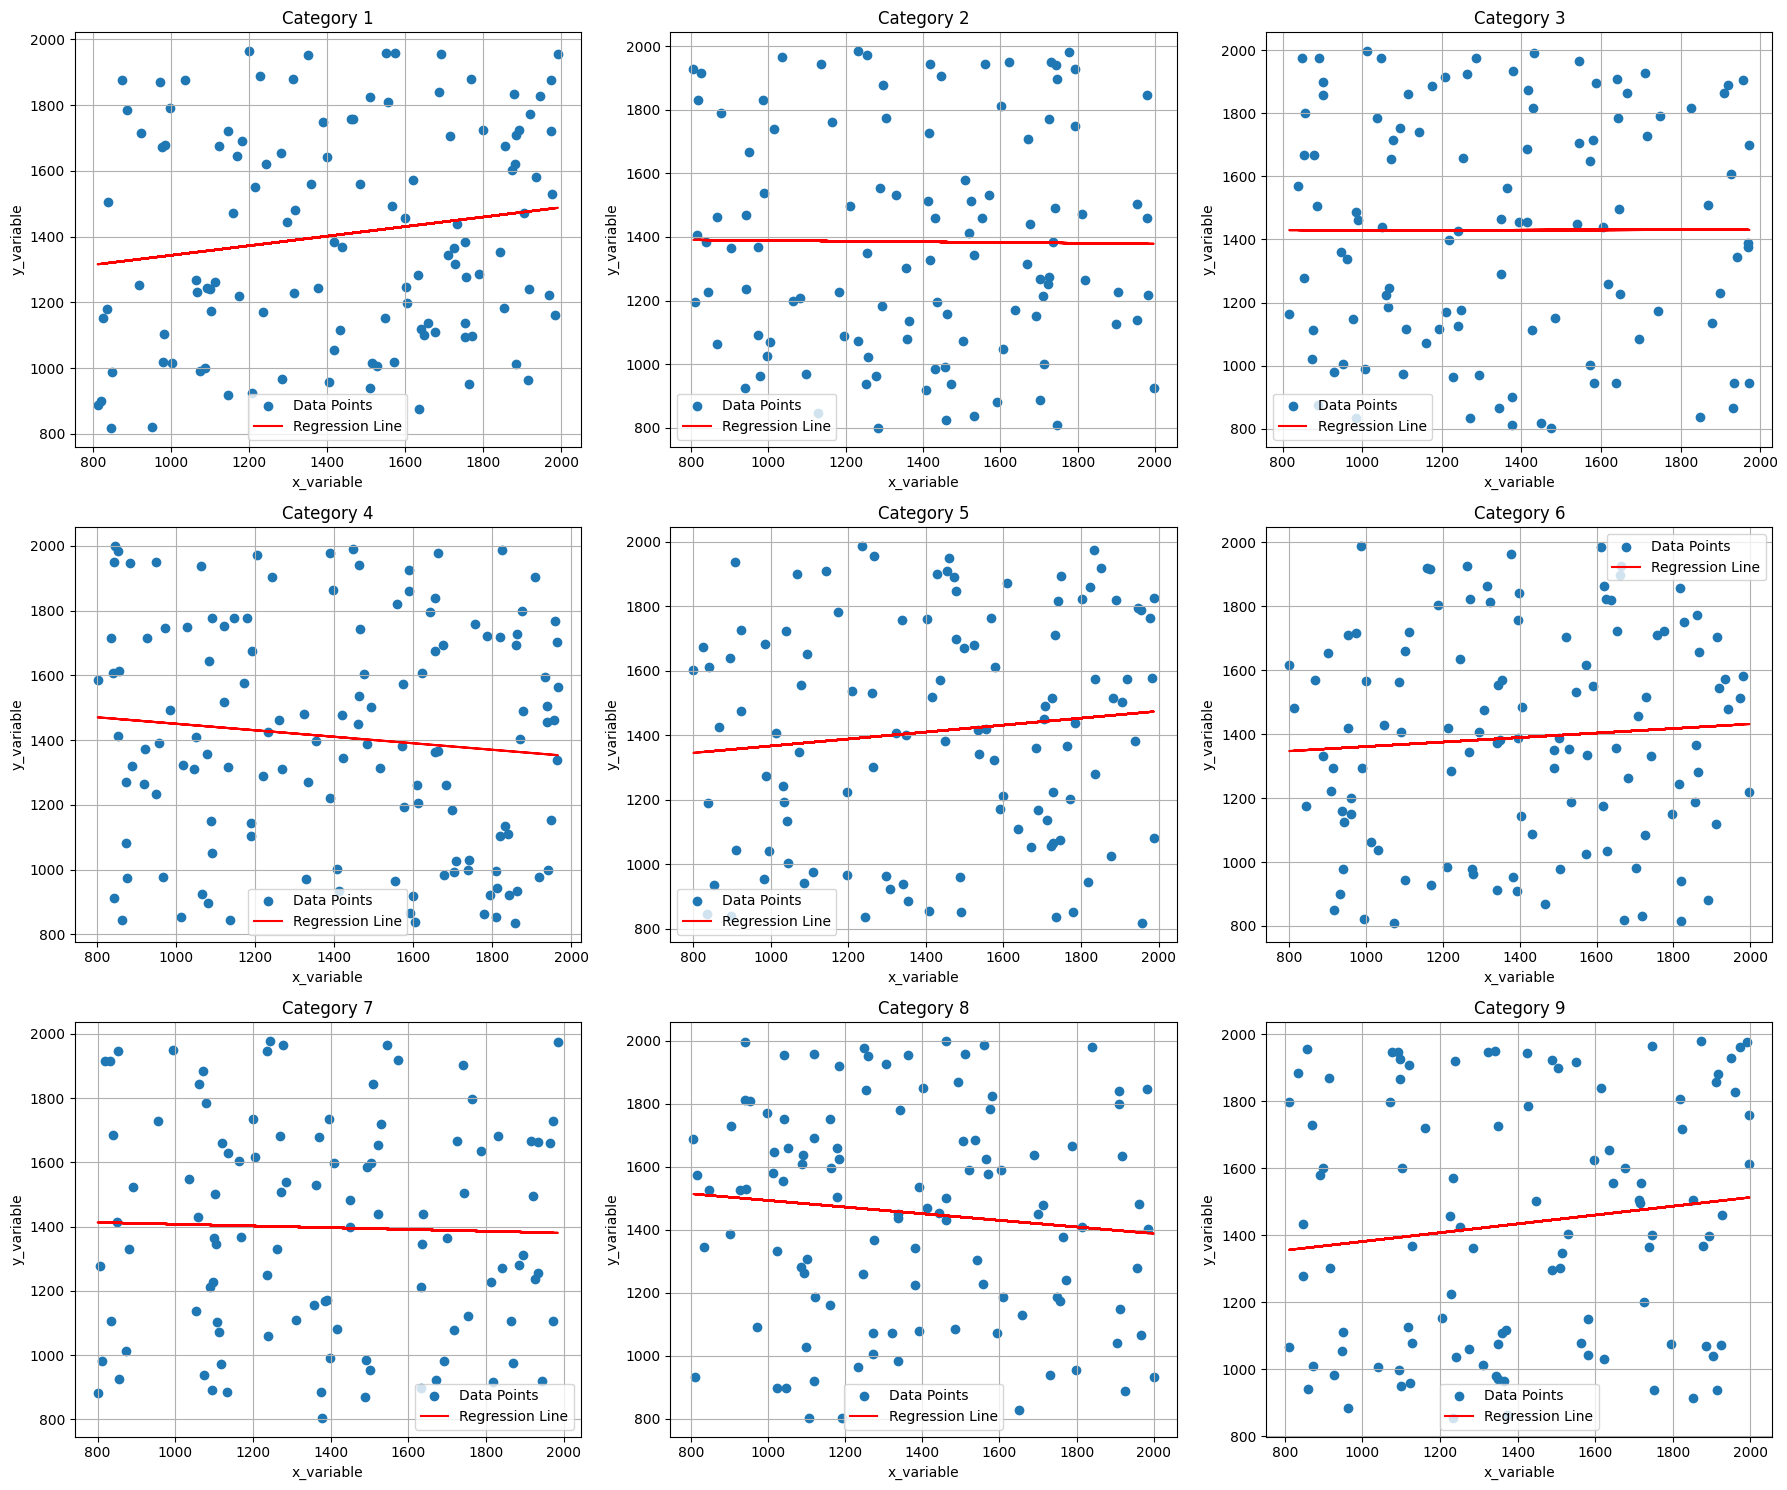

In [11]:
predictions = {}


for category in range(1, 10):
    subset = table_to_plot[table_to_plot['Category'] == category]
    if not subset.empty:
        X = subset[['x_variable']].values
        y = subset['y_variable'].values
        
        
        model = LinearRegression()
        model.fit(X, y)
        
        y_pred = model.predict(X)
        predictions[category] = (X, y, y_pred)


fig, axs = plt.subplots(3, 3, figsize=(18, 15))


for i, category in enumerate(range(1, 10)):
    
    ax = axs[i // 3, i % 3]  

    if category in predictions:
        X, y, y_pred = predictions[category]
        
        ax.scatter(X, y, label='Data Points')
        ax.plot(X, y_pred, color='red', label='Regression Line')
    
    ax.set_title(f'Category {category}')
    ax.set_xlabel('x_variable')
    ax.set_ylabel('y_variable')
    ax.legend()
    ax.grid(True)


plt.tight_layout()

plt.show()

### Problem 7: Create two additional columns in the dataframe table_to_plot, one corresponding to x_variable and one corresponding to y_variable, such that the values of the two existing columns are assigned labels based on what range they are located in, if we were to divide these columns into 3 equally sized intervals. Your result table might look something like this:


In [12]:

def assign_ranges(column):
    min_val = column.min()
    max_val = column.max()
    intervals = np.linspace(min_val, max_val, 4)  # Create 3 intervals
    

    labels = []

    for i in range(len(intervals) - 1):
        if i == 0:
            labels.append(f'({intervals[i]:.1f}, {intervals[i + 1]:.1f}]')
        else:
            labels.append(f'({intervals[i]:.1f}, {intervals[i + 1]:.1f}]')
            
    return pd.cut(column, bins=intervals, labels=labels, include_lowest=True)


In [13]:
table_to_plot['X_range'] = assign_ranges(table_to_plot['x_variable'])
table_to_plot['y_range'] = assign_ranges(table_to_plot['y_variable'])

In [14]:
table_to_plot.head(10)

,Category,x_variable,y_variable,X_range,y_range
0,6,987.984190,1987.717838,"(800.1, 1200.0]","(1599.4, 1999.0]"
1,1,1620.950874,1572.954416,"(1599.9, 1999.8]","(1199.8, 1599.4]"
2,4,840.884918,911.904793,"(800.1, 1200.0]","(800.2, 1199.8]"
3,4,1862.248729,1728.026021,"(1599.9, 1999.8]","(1599.4, 1999.0]"
4,8,1813.824300,1409.448400,"(1599.9, 1999.8]","(1199.8, 1599.4]"
5,4,1412.153600,934.417644,"(1200.0, 1599.9]","(800.2, 1199.8]"
6,6,953.226370,1418.183537,"(800.1, 1200.0]","(1199.8, 1599.4]"
7,3,1545.767643,1706.287571,"(1200.0, 1599.9]","(1599.4, 1999.0]"
8,5,1087.204405,940.570266,"(800.1, 1200.0]","(800.2, 1199.8]"
9,8,1557.045280,1227.507160,"(1200.0, 1599.9]","(1199.8, 1599.4]"
